**TATA POWER LSTM**

Import the libraries

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf 
import seaborn as sns 
import warnings 
warnings.filterwarnings('ignore')
%matplotlib inline 
from sklearn.preprocessing import MinMaxScaler
from datetime import datetime

Import the data 

In [2]:
data =pd.read_csv("/content/data_extracted (1).csv",parse_dates=['Date'])
data

,Unnamed: 0,Date,OpenPrice_TATApower,HighPrice_TATApower,LowPrice_TATApower,ClosePrice_TATApower,WAP_TATApower,NShares_TATApower,OpenPrice_JSWenergy,HighPrice_JSWenergy,...,LowPrice_BOROSILre,ClosePrice_BOROSILre,WAP_BOROSILre,NShares_BOROSILre,OpenPrice_PowerGridCorp,HighPrice_PowerGridCorp,LowPrice_PowerGridCorp,ClosePrice_PowerGridCorp,WAP_PowerGridCorp,NShares_PowerGridCorp
0,0,2022-10-07,221.30,222.90,218.85,222.55,220.883364,1042282,330.00,347.50,...,580.20,583.75,585.920793,38999,204.90,209.70,203.10,209.30,205.630415,1113779
1,1,2022-10-06,221.30,223.25,220.55,221.70,221.945001,517734,301.50,334.00,...,585.70,589.10,591.292242,17246,208.90,210.95,205.55,206.30,207.771811,395480
2,2,2022-10-04,216.50,219.95,216.20,219.00,218.105957,526697,293.05,299.75,...,580.50,584.30,586.085421,16682,213.35,213.35,208.05,208.50,209.380677,247383
3,3,2022-10-03,216.50,218.05,211.95,213.25,215.360304,1317633,300.00,304.80,...,571.05,580.80,585.437640,21408,212.15,214.60,209.05,210.75,211.798039,334049
4,4,2022-09-30,211.75,217.00,210.20,216.50,213.866107,1503876,298.00,304.50,...,573.60,581.50,579.443096,40797,207.75,218.60,207.45,212.15,213.153592,1699878
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
986,986,2018-10-15,70.00,71.60,68.90,71.30,70.747601,676837,64.00,64.50,...,253.00,263.80,260.707157,15230,189.80,189.80,186.45,188.25,187.588410,79154
987,987,2018-10-12,63.30,72.15,63.00,68.85,67.301043,6008374,61.95,65.00,...,245.25,254.10,253.938348,19172,180.30,189.75,180.30,188.65,187.794447,77649
988,988,2018-10-11,63.45,63.85,61.65,62.35,62.742027,367659,59.35,60.20,...,234.75,243.05,242.960758,30121,184.50,188.20,184.10,186.05,185.988775,86327
989,989,2018-10-10,60.75,65.40,60.75,65.00,63.214573,499415,59.10,61.50,...,239.00,248.60,250.959958,29644,186.45,189.00,186.20,187.25,187.504424,40799


Data understanding 

In [3]:
data.shape

(991, 26)

In [4]:
data.head(5)

,Unnamed: 0,Date,OpenPrice_TATApower,HighPrice_TATApower,LowPrice_TATApower,ClosePrice_TATApower,WAP_TATApower,NShares_TATApower,OpenPrice_JSWenergy,HighPrice_JSWenergy,...,LowPrice_BOROSILre,ClosePrice_BOROSILre,WAP_BOROSILre,NShares_BOROSILre,OpenPrice_PowerGridCorp,HighPrice_PowerGridCorp,LowPrice_PowerGridCorp,ClosePrice_PowerGridCorp,WAP_PowerGridCorp,NShares_PowerGridCorp
0,0,2022-10-07,221.30,222.90,218.85,222.55,220.883364,1042282,330.00,347.50,...,580.20,583.75,585.920793,38999,204.90,209.70,203.10,209.30,205.630415,1113779
1,1,2022-10-06,221.30,223.25,220.55,221.70,221.945001,517734,301.50,334.00,...,585.70,589.10,591.292242,17246,208.90,210.95,205.55,206.30,207.771811,395480
2,2,2022-10-04,216.50,219.95,216.20,219.00,218.105957,526697,293.05,299.75,...,580.50,584.30,586.085421,16682,213.35,213.35,208.05,208.50,209.380677,247383
3,3,2022-10-03,216.50,218.05,211.95,213.25,215.360304,1317633,300.00,304.80,...,571.05,580.80,585.437640,21408,212.15,214.60,209.05,210.75,211.798039,334049
4,4,2022-09-30,211.75,217.00,210.20,216.50,213.866107,1503876,298.00,304.50,...,573.60,581.50,579.443096,40797,207.75,218.60,207.45,212.15,213.153592,1699878


In [5]:
data.tail()

,Unnamed: 0,Date,OpenPrice_TATApower,HighPrice_TATApower,LowPrice_TATApower,ClosePrice_TATApower,WAP_TATApower,NShares_TATApower,OpenPrice_JSWenergy,HighPrice_JSWenergy,...,LowPrice_BOROSILre,ClosePrice_BOROSILre,WAP_BOROSILre,NShares_BOROSILre,OpenPrice_PowerGridCorp,HighPrice_PowerGridCorp,LowPrice_PowerGridCorp,ClosePrice_PowerGridCorp,WAP_PowerGridCorp,NShares_PowerGridCorp
986,986,2018-10-15,70.00,71.60,68.90,71.30,70.747601,676837,64.00,64.5,...,253.00,263.80,260.707157,15230,189.80,189.80,186.45,188.25,187.588410,79154
987,987,2018-10-12,63.30,72.15,63.00,68.85,67.301043,6008374,61.95,65.0,...,245.25,254.10,253.938348,19172,180.30,189.75,180.30,188.65,187.794447,77649
988,988,2018-10-11,63.45,63.85,61.65,62.35,62.742027,367659,59.35,60.2,...,234.75,243.05,242.960758,30121,184.50,188.20,184.10,186.05,185.988775,86327
989,989,2018-10-10,60.75,65.40,60.75,65.00,63.214573,499415,59.10,61.5,...,239.00,248.60,250.959958,29644,186.45,189.00,186.20,187.25,187.504424,40799
990,990,2018-10-09,62.35,62.45,59.90,61.05,61.313782,465358,59.40,60.0,...,237.00,239.25,240.428605,25562,189.60,189.60,185.50,186.45,187.046128,56105


In [6]:
data.describe()

,Unnamed: 0,OpenPrice_TATApower,HighPrice_TATApower,LowPrice_TATApower,ClosePrice_TATApower,WAP_TATApower,NShares_TATApower,OpenPrice_JSWenergy,HighPrice_JSWenergy,LowPrice_JSWenergy,...,LowPrice_BOROSILre,ClosePrice_BOROSILre,WAP_BOROSILre,NShares_BOROSILre,OpenPrice_PowerGridCorp,HighPrice_PowerGridCorp,LowPrice_PowerGridCorp,ClosePrice_PowerGridCorp,WAP_PowerGridCorp,NShares_PowerGridCorp
count,991.00000,991.000000,991.000000,991.000000,991.000000,991.000000,9.910000e+02,991.000000,991.000000,991.000000,...,991.000000,991.000000,991.000000,991.000000,991.000000,991.000000,991.000000,991.000000,991.000000,9.910000e+02
mean,495.00000,112.644803,114.524773,110.356559,112.350706,112.463936,2.246543e+06,140.554339,143.861453,136.812765,...,283.122503,289.116246,290.214967,64313.660949,197.321493,199.851110,194.586478,197.064783,197.135542,5.401548e+05
std,286.22136,72.981094,74.185337,71.574216,72.827036,72.908454,2.789081e+06,109.717379,112.448369,106.352057,...,191.222106,195.174412,196.063853,95927.810679,20.426119,20.585899,20.336125,20.396585,20.376838,8.425416e+05
min,0.00000,27.450000,28.600000,27.000000,27.350000,28.017132,4.557300e+04,36.350000,39.950000,34.750000,...,28.000000,28.250000,29.466704,1934.000000,141.750000,151.850000,129.750000,143.850000,146.765477,8.186000e+03
25%,247.50000,58.325000,59.275000,57.100000,57.975000,58.090514,5.997590e+05,65.200000,66.400000,64.100000,...,156.275000,159.900000,160.588864,14535.500000,184.500000,187.175000,181.350000,184.050000,183.937449,1.422460e+05
50%,495.00000,75.100000,76.200000,73.850000,74.950000,74.961489,1.440094e+06,71.000000,72.250000,69.750000,...,226.450000,231.350000,231.177358,31880.000000,195.700000,197.650000,193.550000,195.450000,195.355944,2.802690e+05
75%,742.50000,179.925000,184.400000,175.950000,178.575000,179.481029,2.761471e+06,245.275000,250.875000,238.400000,...,327.500000,338.725000,339.133766,70905.500000,210.500000,213.350000,208.050000,210.375000,210.318655,6.463125e+05
max,990.00000,293.000000,298.000000,280.150000,289.800000,287.331568,2.613305e+07,402.950000,408.700000,390.100000,...,737.150000,780.150000,771.138238,838898.000000,250.950000,251.500000,247.000000,248.700000,249.004822,1.485440e+07


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 991 entries, 0 to 990
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Unnamed: 0                991 non-null    int64         
 1   Date                      991 non-null    datetime64[ns]
 2   OpenPrice_TATApower       991 non-null    float64       
 3   HighPrice_TATApower       991 non-null    float64       
 4   LowPrice_TATApower        991 non-null    float64       
 5   ClosePrice_TATApower      991 non-null    float64       
 6   WAP_TATApower             991 non-null    float64       
 7   NShares_TATApower         991 non-null    int64         
 8   OpenPrice_JSWenergy       991 non-null    float64       
 9   HighPrice_JSWenergy       991 non-null    float64       
 10  LowPrice_JSWenergy        991 non-null    float64       
 11  ClosePrice_JSWenergy      991 non-null    float64       
 12  WAP_JSWenergy         

In [10]:
data1=data [[ 'Date','OpenPrice_TATApower','HighPrice_TATApower','LowPrice_TATApower','ClosePrice_TATApower','WAP_TATApower','NShares_TATApower']]
data1

,Date,OpenPrice_TATApower,HighPrice_TATApower,LowPrice_TATApower,ClosePrice_TATApower,WAP_TATApower,NShares_TATApower
0,2022-10-07,221.30,222.90,218.85,222.55,220.883364,1042282
1,2022-10-06,221.30,223.25,220.55,221.70,221.945001,517734
2,2022-10-04,216.50,219.95,216.20,219.00,218.105957,526697
3,2022-10-03,216.50,218.05,211.95,213.25,215.360304,1317633
4,2022-09-30,211.75,217.00,210.20,216.50,213.866107,1503876
...,...,...,...,...,...,...,...
986,2018-10-15,70.00,71.60,68.90,71.30,70.747601,676837
987,2018-10-12,63.30,72.15,63.00,68.85,67.301043,6008374
988,2018-10-11,63.45,63.85,61.65,62.35,62.742027,367659
989,2018-10-10,60.75,65.40,60.75,65.00,63.214573,499415


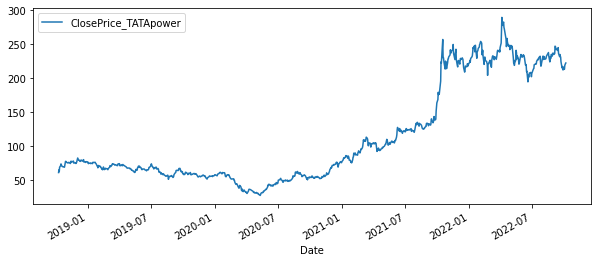

In [11]:
data1.plot('Date','ClosePrice_TATApower',figsize=(10,4))
plt.show()

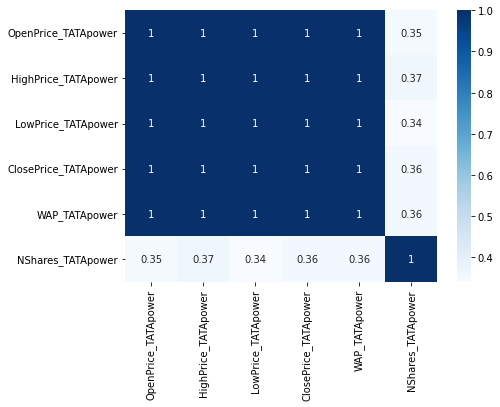

In [12]:
#Heatmap 
plt.figure(figsize=(7,5))
sns.heatmap(data1.corr(),cmap='Blues',annot=True)
plt.show()

From the above heatmap, you can see a large number of 1s and values close to 1. This means those variables show high positive correlations and are interrelated. This might be possible because of the comparatively very small difference between those values. However, in-stock market this small value is what makes the difference. So, what we are going to do, is add new variables to our dataset that represents the difference between those values.

In [13]:
data1['OpenPrice_TATApower-HighPrice_TATApower'] = data1['OpenPrice_TATApower']-data1['HighPrice_TATApower']
data1['OpenPrice_TATApower-LowPrice_TATApower'] = data1['OpenPrice_TATApower'] - data1['LowPrice_TATApower']
data1['ClosePrice_TATApower-HighPrice_TATApower'] = data1['ClosePrice_TATApower']-data1['HighPrice_TATApower']
data1['ClosePrice_TATApower-LowPrice_TATApower'] = data1['ClosePrice_TATApower'] - data1['LowPrice_TATApower']
data1['HighPrice_TATApower-LowPrice_TATApower'] = data1['HighPrice_TATApower'] - data1['LowPrice_TATApower']
data1['OpenPrice_TATApower-ClosePrice_TATApower'] = data1['OpenPrice_TATApower'] - data1['ClosePrice_TATApower']
data1.head()

,Date,OpenPrice_TATApower,HighPrice_TATApower,LowPrice_TATApower,ClosePrice_TATApower,WAP_TATApower,NShares_TATApower,OpenPrice_TATApower-HighPrice_TATApower,OpenPrice_TATApower-LowPrice_TATApower,ClosePrice_TATApower-HighPrice_TATApower,ClosePrice_TATApower-LowPrice_TATApower,HighPrice_TATApower-LowPrice_TATApower,OpenPrice_TATApower-ClosePrice_TATApower
0,2022-10-07,221.30,222.90,218.85,222.55,220.883364,1042282,-1.60,2.45,-0.35,3.70,4.05,-1.25
1,2022-10-06,221.30,223.25,220.55,221.70,221.945001,517734,-1.95,0.75,-1.55,1.15,2.70,-0.40
2,2022-10-04,216.50,219.95,216.20,219.00,218.105957,526697,-3.45,0.30,-0.95,2.80,3.75,-2.50
3,2022-10-03,216.50,218.05,211.95,213.25,215.360304,1317633,-1.55,4.55,-4.80,1.30,6.10,3.25
4,2022-09-30,211.75,217.00,210.20,216.50,213.866107,1503876,-5.25,1.55,-0.50,6.30,6.80,-4.75


From the previous heatmap, we could realize that those values aren’t very useful. So for more clarity, we will drop those values and take only the new values for creating the heatmap.

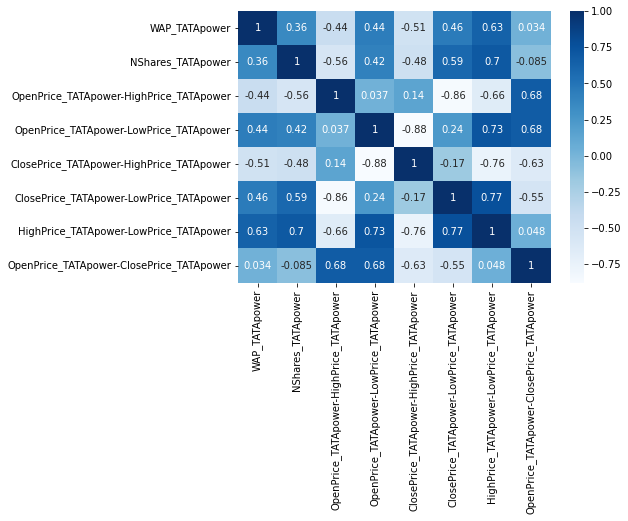

In [14]:
#Heatmap
data2 = data1.copy()
data2 = data2.drop(['OpenPrice_TATApower','HighPrice_TATApower','LowPrice_TATApower','ClosePrice_TATApower',],axis=1)
plt.figure(figsize=(7,5))
sns.heatmap(data2.corr(),cmap='Blues',annot=True)
plt.show()

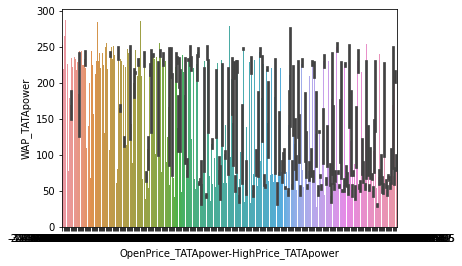

In [15]:
sns.barplot(data=data1, x = "OpenPrice_TATApower-HighPrice_TATApower", y="WAP_TATApower")
plt.show()

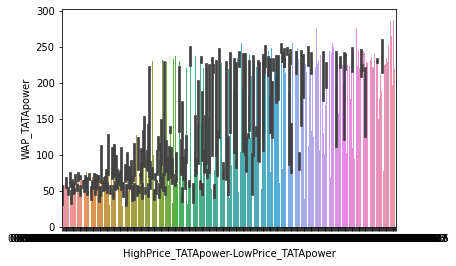

In [16]:
sns.barplot(data=data1, x = "HighPrice_TATApower-LowPrice_TATApower", y="WAP_TATApower")

Moving Average - MA' A moving average (MA) is a widely used indicator in technical analysis that helps smooth out price action by filtering out the “noise” from random price fluctuations. It is a trend-following, or lagging, indicator because it is based on past prices.



In [17]:
# Let's go ahead and plot out several moving averages
ma_day = [10,20,50]

for ma in ma_day:
    column_name = "MA for %s days" %(str(ma))
    data1[column_name]=pd.DataFrame.rolling(data1['ClosePrice_TATApower'],ma).mean()

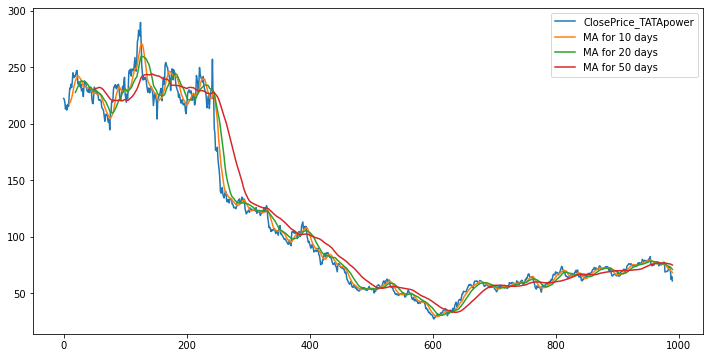

In [18]:
data1[['ClosePrice_TATApower','MA for 10 days','MA for 20 days','MA for 50 days']].plot(subplots=False,figsize=(12,6))
plt.show()

In [19]:
data1=data.reset_index()['ClosePrice_TATApower']
data1

0      222.55
1      221.70
2      219.00
3      213.25
4      216.50
        ...  
986     71.30
987     68.85
988     62.35
989     65.00
990     61.05
Name: ClosePrice_TATApower, Length: 991, dtype: float64

In [20]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
data1=scaler.fit_transform(np.array(data1).reshape(-1,1))

In [21]:
print(data1)

[[0.74376072]
 [0.740522  ]
 [0.73023433]
 [0.7083254 ]
 [0.72070871]
 [0.70451515]
 [0.71061155]
 [0.72432844]
 [0.71708897]
 [0.75157173]
 [0.77843399]
 [0.77671938]
 [0.79176986]
 [0.78072014]
 [0.79767575]
 [0.83025338]
 [0.81577443]
 [0.81405982]
 [0.82072776]
 [0.81920366]
 [0.82891979]
 [0.83673081]
 [0.83825491]
 [0.79653267]
 [0.79119832]
 [0.79919985]
 [0.7984378 ]
 [0.78243475]
 [0.79157935]
 [0.76909888]
 [0.77024195]
 [0.77786245]
 [0.75004763]
 [0.78243475]
 [0.80262907]
 [0.79958087]
 [0.79500857]
 [0.78129167]
 [0.77005144]
 [0.76624119]
 [0.76566965]
 [0.7801486 ]
 [0.7633835 ]
 [0.78148219]
 [0.78205372]
 [0.77348066]
 [0.74128405]
 [0.72699562]
 [0.72623357]
 [0.75747761]
 [0.7816727 ]
 [0.77538579]
 [0.77214708]
 [0.76224043]
 [0.76509811]
 [0.76376453]
 [0.75328634]
 [0.73880739]
 [0.73728329]
 [0.73956944]
 [0.73709278]
 [0.73423509]
 [0.71308821]
 [0.71099257]
 [0.70642027]
 [0.70165746]
 [0.68451134]
 [0.66679367]
 [0.68527339]
 [0.69098876]
 [0.6885121 ]
 [0.68

In [22]:
##splitting dataset into train and test split
training_size=int(len(data1)*0.65)
test_size=len(data1)-training_size
train_data,test_data=data1[0:training_size,:],data1[training_size:len(data1),:1]

In [23]:
training_size,test_size

(644, 347)

In [24]:
train_data

array([[0.74376072],
       [0.740522  ],
       [0.73023433],
       [0.7083254 ],
       [0.72070871],
       [0.70451515],
       [0.71061155],
       [0.72432844],
       [0.71708897],
       [0.75157173],
       [0.77843399],
       [0.77671938],
       [0.79176986],
       [0.78072014],
       [0.79767575],
       [0.83025338],
       [0.81577443],
       [0.81405982],
       [0.82072776],
       [0.81920366],
       [0.82891979],
       [0.83673081],
       [0.83825491],
       [0.79653267],
       [0.79119832],
       [0.79919985],
       [0.7984378 ],
       [0.78243475],
       [0.79157935],
       [0.76909888],
       [0.77024195],
       [0.77786245],
       [0.75004763],
       [0.78243475],
       [0.80262907],
       [0.79958087],
       [0.79500857],
       [0.78129167],
       [0.77005144],
       [0.76624119],
       [0.76566965],
       [0.7801486 ],
       [0.7633835 ],
       [0.78148219],
       [0.78205372],
       [0.77348066],
       [0.74128405],
       [0.726

In [25]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [26]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [27]:
print(X_train.shape), print(y_train.shape)

(543, 100)
(543,)


(None, None)

In [28]:
print(X_test.shape), print(ytest.shape)

(246, 100)
(246,)


(None, None)

In [29]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [30]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [31]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [32]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [33]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [34]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [35]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=150,batch_size=64,verbose=1)

Epoch 1/150
9/9 [==============================] - 10s 461ms/step - loss: 0.0571 - val_loss: 0.0028
Epoch 2/150
9/9 [==============================] - 2s 210ms/step - loss: 0.0159 - val_loss: 5.4897e-04
Epoch 3/150
9/9 [==============================] - 2s 186ms/step - loss: 0.0060 - val_loss: 2.9626e-04
Epoch 4/150
9/9 [==============================] - 2s 218ms/step - loss: 0.0042 - val_loss: 8.1531e-04
Epoch 5/150
9/9 [==============================] - 2s 202ms/step - loss: 0.0035 - val_loss: 0.0015
Epoch 6/150
9/9 [==============================] - 2s 210ms/step - loss: 0.0030 - val_loss: 5.8309e-04
Epoch 7/150
9/9 [==============================] - 2s 212ms/step - loss: 0.0027 - val_loss: 6.2459e-04
Epoch 8/150
9/9 [==============================] - 2s 209ms/step - loss: 0.0025 - val_loss: 3.1618e-04
Epoch 9/150
9/9 [==============================] - 2s 208ms/step - loss: 0.0025 - val_loss: 6.6168e-04
Epoch 10/150
9/9 [==============================] - 2s 207ms/step - loss: 0.0025

In [36]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)


8/8 [==============================] - 0s 35ms/step


In [37]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [38]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

142.0174889611516

In [39]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

66.7245811713648

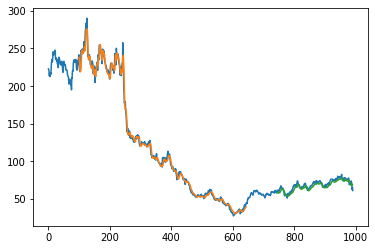

In [40]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(data1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(data1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(data1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(data1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [41]:
len(test_data)

347

In [57]:
x_input=test_data[237:].reshape(1,-1)
x_input.shape

(1, 110)

In [58]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [44]:
temp_input

[0.15126690798247283,
 0.14478948371118305,
 0.1453610211468851,
 0.14840922080396263,
 0.1497428081539341,
 0.15145742046104016,
 0.1526004953324443,
 0.14802819584682797,
 0.1466946084968565,
 0.14497999618975044,
 0.15964945703943606,
 0.1533625452467136,
 0.14402743379691368,
 0.14859973328252996,
 0.14612307106115452,
 0.15736330729662795,
 0.16041150695370543,
 0.16326919413221563,
 0.16193560678224417,
 0.16441226900361972,
 0.1680320060963993,
 0.16746046866069725,
 0.15507715755381973,
 0.16631739378929317,
 0.1655553438750238,
 0.1775576300247666,
 0.1800342922461421,
 0.18251095446751758,
 0.18651171651743187,
 0.18517812916746046,
 0.1853686416460278,
 0.1853686416460278,
 0.18632120403886454,
 0.18136787959611356,
 0.17831967993903602,
 0.18155839207468089,
 0.18079634216041146,
 0.178891217374738,
 0.1809868546389788,
 0.1804153172032768,
 0.18212992951038293,
 0.17831967993903602,
 0.1809868546389788,
 0.18860735378167265,
 0.188226328824538,
 0.18975042865307679,
 0.189

In [59]:
# demonstrate prediction for next 30 days
from numpy import array

lst_output=[]
n_steps=110
i=0
while(i<60):
    
    if(len(temp_input)>110):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)


[0.14532398]
111
1 day input [0.17679558 0.17393789 0.17660507 0.17527148 0.16898457 0.16193561
 0.16460278 0.16746047 0.15869689 0.15126691 0.14478948 0.14536102
 0.14840922 0.14974281 0.15145742 0.1526005  0.1480282  0.14669461
 0.14498    0.15964946 0.15336255 0.14402743 0.14859973 0.14612307
 0.15736331 0.16041151 0.16326919 0.16193561 0.16441227 0.16803201
 0.16746047 0.15507716 0.16631739 0.16555534 0.17755763 0.18003429
 0.18251095 0.18651172 0.18517813 0.18536864 0.18536864 0.1863212
 0.18136788 0.17831968 0.18155839 0.18079634 0.17889122 0.18098685
 0.18041532 0.18212993 0.17831968 0.18098685 0.18860735 0.18822633
 0.18975043 0.18917889 0.18517813 0.18822633 0.18727377 0.20099066
 0.198514   0.19565632 0.19222709 0.19813298 0.19508478 0.19679939
 0.19679939 0.1908935  0.19794247 0.19737093 0.20213374 0.20556296
 0.21013526 0.1863212  0.18193942 0.17908173 0.18365403 0.18384454
 0.18117737 0.19203658 0.19317965 0.1893694  0.1878453  0.18765479
 0.19260812 0.18517813 0.17908173 

In [63]:
day_new=np.arange(1,101)
day_pred=np.arange(101,161)

In [61]:

import matplotlib.pyplot as plt

In [62]:
len(data1)

991

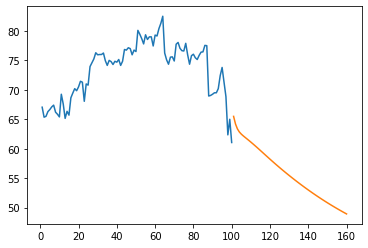

In [66]:
plt.plot(day_new,scaler.inverse_transform(data1[891:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

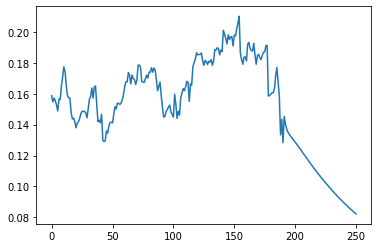

In [67]:
df3=data1.tolist()
df3.extend(lst_output)
plt.plot(df3[800:])

In [68]:
df3=scaler.inverse_transform(df3).tolist()


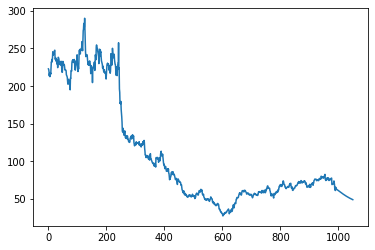

In [69]:
plt.plot(df3)